In [2]:
!git clone https://github.com/guyuxuan9/MML_coursework.git

Cloning into 'MML_coursework'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 52 (delta 1), reused 5 (delta 0), pack-reused 43 (from 1)
Receiving objects: 100% (52/52), 77.15 MiB | 44.71 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
!pip install --upgrade tf_fourier_features

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, AveragePooling1D
import matplotlib.pyplot as plt
import tensorflow as tf
from tf_fourier_features import FourierFeatureProjection
from tf_fourier_features import FourierFeatureMLP

Training set: (12600, 9) (12600,)
Validation set: (2700, 9) (2700,)
Test set: (2700, 9) (2700,)
Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.5482 - loss: 0.6926 - val_accuracy: 0.6730 - val_loss: 0.6902
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6781 - loss: 0.6885 - val_accuracy: 0.7563 - val_loss: 0.6836
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7853 - loss: 0.6795 - val_accuracy: 0.8130 - val_loss: 0.6679
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.6583 - val_accuracy: 0.8459 - val_loss: 0.6351
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8809 - loss: 0.6167 - val_accuracy: 0.8859 - val_loss: 0.5682
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.5317 - val_accuracy: 0.9444 - val_loss: 0.4342
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9477 - loss: 0.3870 - val_accuracy: 0.9519 - val_loss: 0.2980
Epoch 

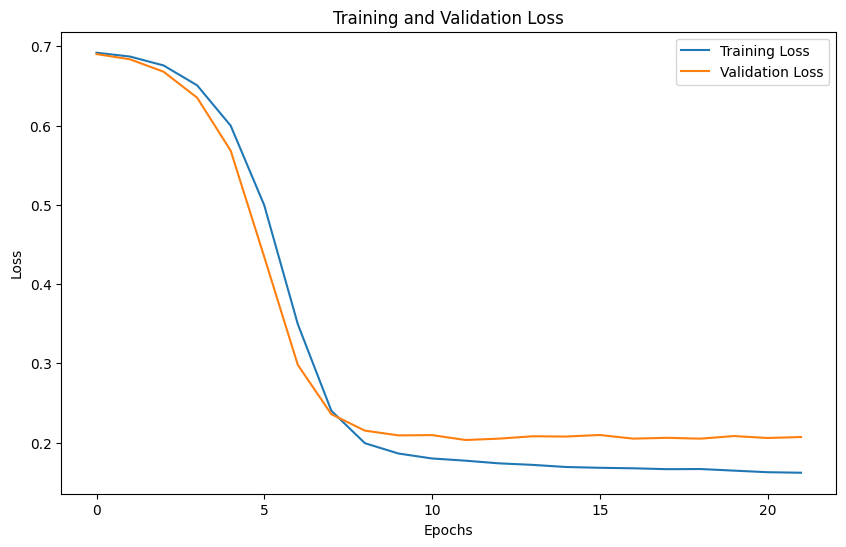

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9607 - loss: 0.1792
Test Loss: 0.1709, Test Accuracy: 0.9630


In [10]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-9-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-9-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=45, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Training set: (16800, 12) (16800,)
Validation set: (3600, 12) (3600,)
Test set: (3600, 12) (3600,)
Epoch 1/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.4960 - loss: 0.6935 - val_accuracy: 0.5031 - val_loss: 0.6932
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5072 - loss: 0.6932 - val_accuracy: 0.5031 - val_loss: 0.6932
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5056 - val_loss: 0.6931
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5076 - loss: 0.6928 - val_accuracy: 0.5156 - val_loss: 0.6920
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5457 - loss: 0.6852 - val_accuracy: 0.6308 - val_loss: 0.6025
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8722 - loss: 0.3318 - val_accuracy: 0.9528 - val_loss: 0.1818
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1626 - val_accuracy: 0.9419 - val_loss: 0.1917
Epo

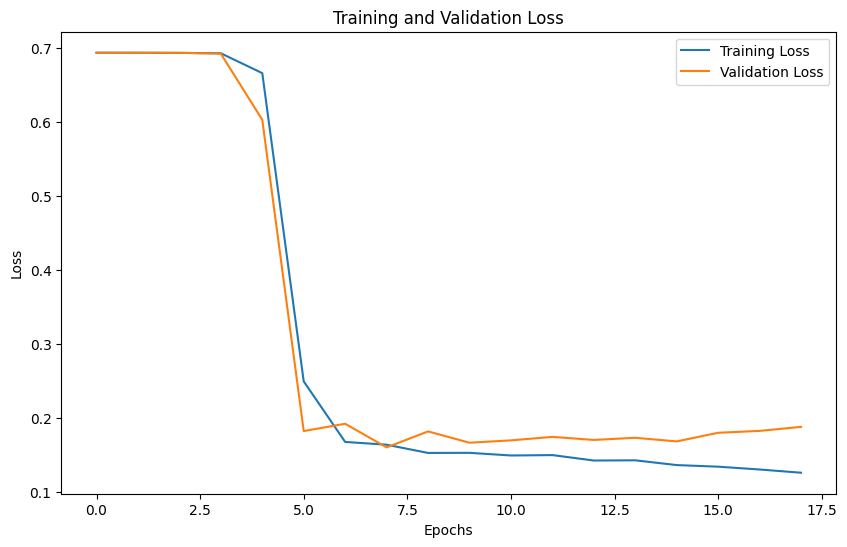

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9647 - loss: 0.1530
Test Loss: 0.1620, Test Accuracy: 0.9628


In [6]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-12-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-12-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=15, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Training set: (21000, 15) (21000,)
Validation set: (4500, 15) (4500,)
Test set: (4500, 15) (4500,)
Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.5042 - loss: 0.6930 - val_accuracy: 0.4984 - val_loss: 0.6931
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4997 - loss: 0.6933 - val_accuracy: 0.5040 - val_loss: 0.6932
Epoch 3/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5099 - loss: 0.6931 - val_accuracy: 0.5042 - val_loss: 0.6931
Epoch 5/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5105 - loss: 0.6931 - val_accuracy: 0.4969 - val_loss: 0.6931
Epoch 6/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5030 - loss: 0.6929 - val_accuracy: 0.5051 - val_loss: 0.6931
Epoch 7/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5174 - loss: 0.6924 - val_accuracy: 0.5044 - val_loss: 0.6936
Epo

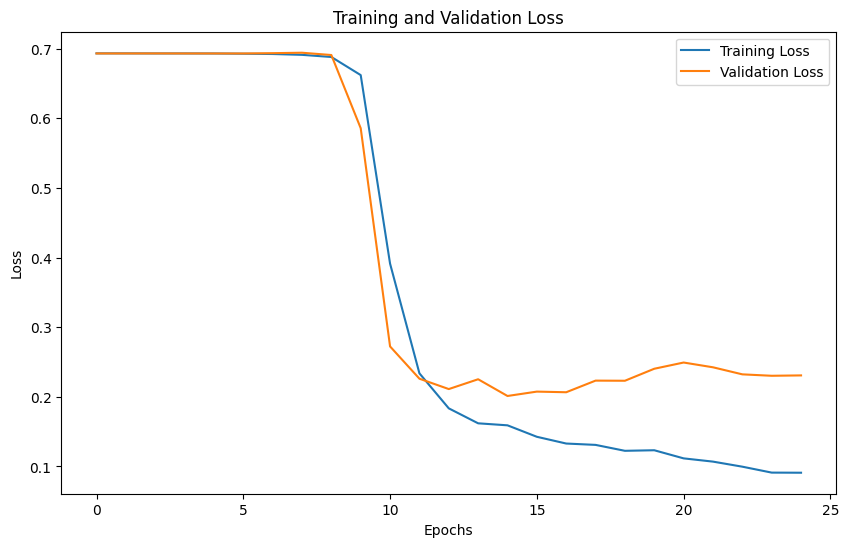

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.2305
Test Loss: 0.2175, Test Accuracy: 0.9340


In [7]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-15-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-15-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=15, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [8]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

Training set: (25200, 18) (25200,)
Validation set: (5400, 18) (5400,)
Test set: (5400, 18) (5400,)
Epoch 1/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.4945 - loss: 0.6933 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 2/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5051 - loss: 0.6932 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 3/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4926 - val_loss: 0.6932
Epoch 4/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4926 - val_loss: 0.6932
Epoch 5/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 6/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.4915 - val_loss: 0.6932
Epoch 7/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5067 - loss: 0.6931 - val_accuracy: 0.5054 - val_loss: 0.6931
Epo

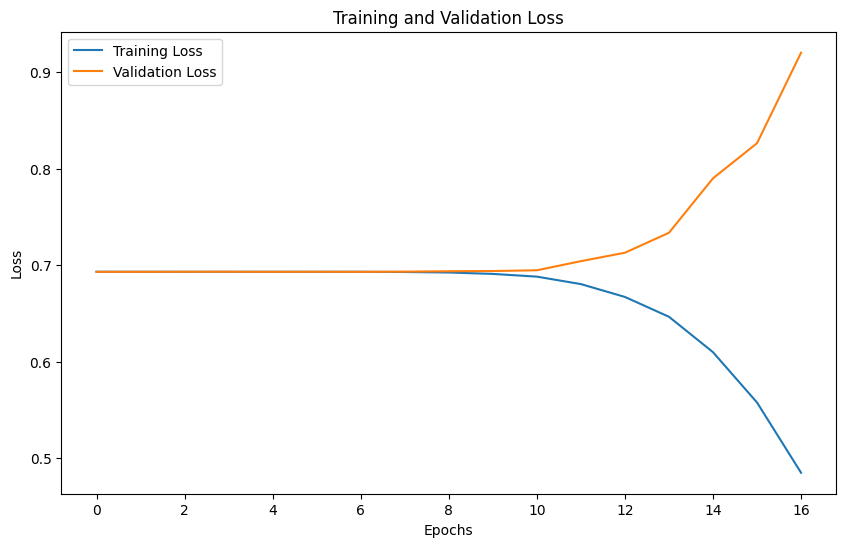

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4929 - loss: 0.6932
Test Loss: 0.6932, Test Accuracy: 0.4944


In [11]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-18-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-18-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=15, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(128, activation='relu')(ip)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")